In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('fake_job_postings.xlsx')

In [3]:
df.sample(20)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,location_c
10983,10984,S8 7RB Customer Service Apprenticeship availab...,"GB, SHF,",NaN,NaN,Established on the principles that full time e...,his is fantastic opportunity for someone wanti...,Government funding is only available for 16-18...,Future Prospects,0,1,1,NaN,Not Applicable,High School or equivalent,NaN,NaN,0,GB
21,22,Front End Developer,"NZ, N, Auckland",NaN,NaN,Frustrated with the status quo?Like to re-imag...,Want to be part of a globally focused tech tea...,You will most likely have:A solid mastery of m...,You will be part of an awesome team of innovat...,0,1,0,Full-time,Mid-Senior level,Master's Degree,Consumer Electronics,Engineering,0,NZ
14009,14010,"SENIOR BUSINESS MANAGEMENT CONSULTANT, London","GB, LND, London",NaN,NaN,NaN,"SENIOR BUSINESS MANAGEMENT CONSULTANT, LondonÂ...","""BIG Four"" experience.Your Profile:Â In partic...",DOE,0,0,1,NaN,NaN,NaN,NaN,NaN,0,GB
4598,4599,Post for Assistant Director in Education,"IN, DL, New Delhi",NaN,721000-780000,NaN,Fiinovation invites applicants to apply for th...,Desired Candidate Profile:Â Experience in the ...,NaN,0,0,0,Full-time,Mid-Senior level,Master's Degree,Education Management,NaN,0,IN
116,117,Executive Assistant,"US, CA, San Francisco",NaN,NaN,Intercom (#URL_cb674f93cbcd215a3a0a57a8615a565...,"About the RoleIntercom is a young, fast-paced ...",The ideal candidate will:Have at least 1 year ...,"Benefits include a competitive salary DOE, equ...",0,1,1,Full-time,Entry level,Bachelor's Degree,Internet,Administrative,0,US
11111,11112,Mirfield Warehousing Apprenticeship Under NAS ...,"GB, , Mirfield",NaN,NaN,Established on the principles that full time e...,Â Government funding is only available for 16-...,16-18 year olds only due to government funding...,Career prospects.,0,1,1,Full-time,Not Applicable,High School or equivalent,Warehousing,NaN,0,GB
3050,3051,ECAD Engineer,"MX, CHH, JuÃ¡rez",NaN,NaN,QuiÃ©nes SomosSomos una firma mexicana de jÃ³v...,"Trasnational company, leader provider of end-t...",NaN,Growth opportunity in a trasnational TI company.,0,1,1,Full-time,Mid-Senior level,NaN,Automotive,Engineering,0,MX
4993,4994,In-house Recruiter,"GB, , London",NaN,NaN,Want to build a 21st century financial service...,You've either been running an internal recruit...,NaN,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Internet,General Business,0,GB
12168,12169,Mobile Developer (m/f),"DE, BE, Berlin",IT,24000-36000,"Wir sind ein junges Berliner Mobile-Startup, d...",Employment: Full-timeStart date: NowZappChoice...,High level of expertise in mobile development ...,A professional environment with agile processe...,0,1,1,Full-time,Associate,Bachelor's Degree,Market Research,Information Technology,0,DE
15029,15030,"Home Health CNA--Shelley, ID","US, ID, Shelley",NaN,NaN,"Critical Nurse Staffing, Inc. is enrolled with...","Critical Nurse Staffing, Inc. is seeking a CNA...",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17871 non-null  object
 7   requirements         15147 non-null  object
 8   benefits             10639 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17871 non-null  object
 7   requirements         15147 non-null  object
 8   benefits             10639 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                9
requirements            2733
benefits                7241
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
location_c               346
dtype: int64

In [7]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


In [9]:
df.drop('location', axis=1, inplace=True)

In [10]:
# kindly take note that locations was splited into just country codes.

In [11]:
df.columns

Index(['job_id', 'title', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'location_c'],
      dtype='object')

# Data Cleaning

<AxesSubplot:>

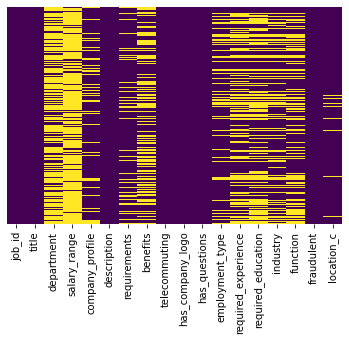

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
df.drop('company_profile', axis=1, inplace=True)
df.drop('description', axis=1, inplace=True)
df.drop('title', axis=1, inplace=True)
df.drop('requirements', axis=1, inplace=True)
df.drop('benefits', axis=1, inplace=True)
df.drop('salary_range', axis=1, inplace=True) 
df.drop('department', axis=1, inplace=True)

In [14]:
# the above was dropped because it is not really relevant to what we are looking for.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   telecommuting        17880 non-null  int64 
 2   has_company_logo     17880 non-null  int64 
 3   has_questions        17880 non-null  int64 
 4   employment_type      14409 non-null  object
 5   required_experience  10830 non-null  object
 6   required_education   9775 non-null   object
 7   industry             12977 non-null  object
 8   function             11425 non-null  object
 9   fraudulent           17880 non-null  int64 
 10  location_c           17534 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.5+ MB


In [16]:
df['employment_type'].fillna(method="backfill", inplace=True)
df['required_experience'].fillna(method="backfill", inplace=True)
df['location_c'].fillna(method="backfill", inplace=True)
df['required_education'].fillna(method="backfill", inplace=True)
df['industry'].fillna(method="backfill", inplace=True)
df['function'].fillna(method="backfill", inplace=True)

In [17]:
df.isnull().sum()

job_id                 0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     1
industry               0
function               0
fraudulent             0
location_c             0
dtype: int64

In [18]:
df['required_education'].fillna(method="ffill", inplace=True)

In [19]:
df.isnull().sum()

job_id                 0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
location_c             0
dtype: int64

<AxesSubplot:>

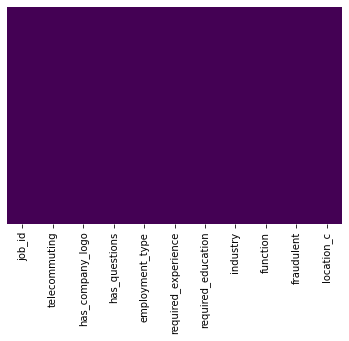

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
# from the above we can see that we have a very clean and workable data

# Exploratory Analysis and Visualization

In [22]:
df.sample(10)

,job_id,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,location_c
4276,4277,0,1,0,Full-time,Associate,Bachelor's Degree,Construction,Engineering,0,US
5688,5689,0,0,0,Full-time,Entry level,High School or equivalent,Telecommunications,Customer Service,1,US
5220,5221,1,1,1,Contract,Not Applicable,Unspecified,Computer Software,Sales,0,US
4788,4789,0,1,1,Full-time,Mid-Senior level,Unspecified,Marketing and Advertising,Sales,0,US
2908,2909,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Advertising,0,GR
16856,16857,0,0,1,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0,GR
7346,7347,0,0,1,Full-time,Not Applicable,High School or equivalent,Education Management,Administrative,0,US
17596,17597,0,1,0,Full-time,Associate,High School or equivalent,Financial Services,Business Development,1,US
7406,7407,0,1,0,Full-time,Entry level,Bachelor's Degree,Marketing and Advertising,Information Technology,0,US
1585,1586,0,1,1,Other,Internship,High School or equivalent,Design,Design,0,GR


In [23]:
# no of fake Job postings
fake_job= df.fraudulent.value_counts()

In [24]:
fake_job

0    17014
1      866
Name: fraudulent, dtype: int64

In [25]:
# there are 866 fake job postings in the data set and can e represented graphically as shown below.

C:\Users\ADEBIMPE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='fraudulent'>

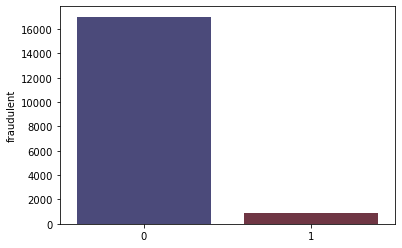

In [26]:
sns.barplot(fake_job.index, fake_job, palette='icefire')

In [27]:
fake_country = df.groupby('location_c')[['fraudulent']].sum

In [28]:
fake_country(10)

,fraudulent
location_c,
AE,1
AL,0
AM,0
AR,0
AT,0
...,...
US,742
VI,0
VN,0


In [29]:
industry_fake = df[df['location_c']=='US'].groupby(['industry'])[['fraudulent']].sum().sort_values('fraudulent', ascending=False).head(10)

In [30]:
industry_fake.head(10)

,fraudulent
industry,
Oil & Energy,116
Hospital & Health Care,69
Accounting,65
Marketing and Advertising,51
Information Technology and Services,47
Financial Services,44
Telecommunications,43
Consumer Services,31
Real Estate,29


In [31]:
# from the data set we have a high score of 116 fake job posting from the oil and energy industry

C:\Users\ADEBIMPE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'industry')

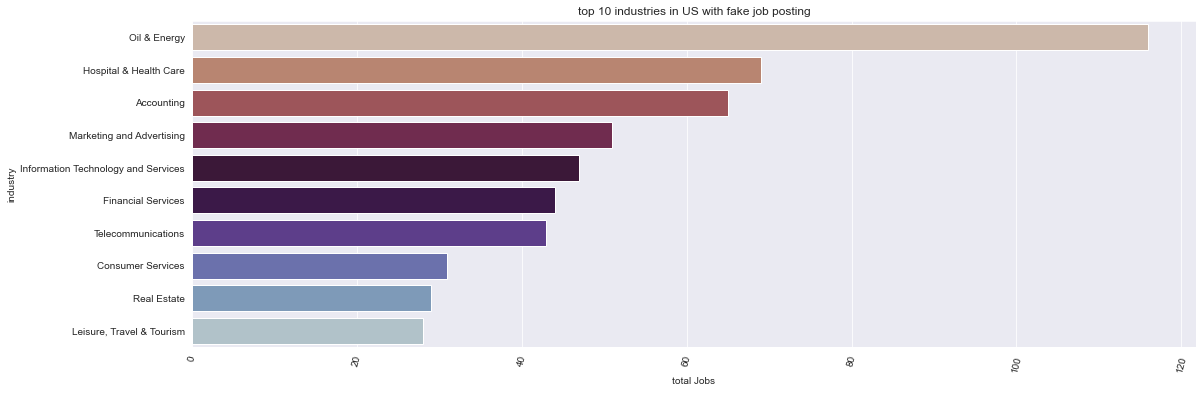

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,6))
plt.xticks(rotation=75)
plt.title('top 10 industries in US with fake job posting')
sns.barplot(industry_fake.fraudulent, industry_fake.index, palette='twilight_r')
plt.xlabel('total Jobs')
plt.ylabel('industry')

In [33]:
# above is the graphical representation of fake job posting by industry

In [34]:
employ = df.groupby('employment_type',)[['fraudulent']].sum

In [39]:
employ(10)

,fraudulent
employment_type,
Contract,77
Full-time,651
Other,23
Part-time,109
Temporary,6


In [41]:
employ_fake = df[df['location_c']=='US'].groupby(['employment_type'])[['fraudulent']].sum().sort_values('fraudulent', ascending=False).head(10)

In [44]:
employ_fake

,fraudulent
employment_type,
Full-time,590
Contract,65
Part-time,64
Other,17
Temporary,6


C:\Users\ADEBIMPE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'employment_type')

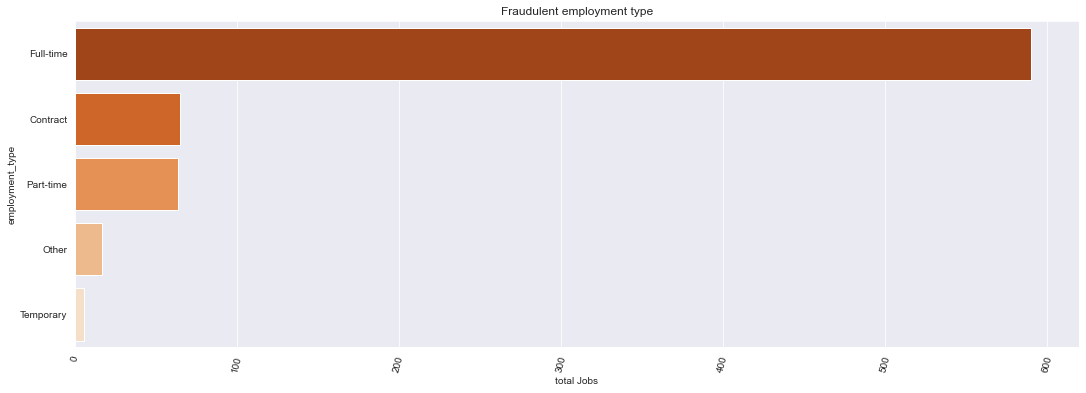

In [49]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,6))
plt.xticks(rotation=75)
plt.title('Fraudulent employment type')
sns.barplot(employ_fake.fraudulent, employ_fake.index, palette='Oranges_r')
plt.xlabel('total Jobs')
plt.ylabel('employment_type')